# 서포트 벡터 머신_분류

Q. 유방암 결과를 분류하는 서포트 벡터 머신 모델을 만들고 predict method를 이용하여 목표변수 범주를 예측하라.

그리고 모델의 정확도와 confusion matrix를 구하라.

서포트 벡터 머신 : 입력데이터(저차원)을 고차원 공간으로 변환하고 고차원 공간에서 선형으로 분리할 수 있는 초평면 또는 최적의 선형 결정 경계를 찾는 알고리즘

장점 : 선형/비선형 구조의 다양한 분류/예측 문제 적용 가능, 우수한 분류/예측 결과를 보임

단점 : 결과 해석이 어려움. 데이터 단위의 영향이 커서 표준화(scale)필수

In [95]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [96]:
import os
os.chdir("/home/piai/문서/2. Big Data 분석")
os.getcwd()
df_raw = pd.read_csv("./HMEQ.csv", encoding = 'euc=kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [97]:
matplotlib.rc("font",family = "NanumGothic")
matplotlib.rc("axes",unicode_minus = False)

In [98]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [ ]:
def diag(x):
    if x == "음성":
        return 0
    else:
        return 1

In [ ]:
# diagnosis열이 '음성', '양성' 을 정수에 대입시켜 변환시켜준다
df_raw['diagnosis'] = df_raw['diagnosis'].apply(diag)

In [100]:
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [101]:
df_raw_y = df_raw["diagnosis"]
df_raw_x = df_raw.drop("diagnosis",axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.4, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (192, 30)
train data Y size : (192,)
test data X size : (128, 30)
test data Y size : (128,)


## 기본 옵션으로 모델 생성

In [102]:
svm_uncustomized = SVC(random_state = 1234)
svm_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.885
Accuracy on test set: 0.891


#### train모델의 정확도 보다 test 모델의 정확도가 더 높다. 이 모델은 성능의 개선이 더 필요하다고 해석했다.

In [103]:
print(svm_uncustomized.get_params().keys())
print(svm_uncustomized.get_params().values())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
dict_values([1.0, False, 200, None, 0.0, 'ovr', 3, 'scale', 'rbf', -1, False, 1234, True, 0.001, False])


## C(Cost) 변경에 따른 모델 성능

##### 이상치가 포함된 경우 완벽하게 분리할 수 없어 일정 수준의 오류를 허용
##### 얼마나 많은 데이터를 다른 클래스에 놓이는 것을 허용하는지를 결정
##### C가 작을수록 오류를 많이 허용 , C가 클수록 오류를 적게 허용(과대적합주의)

In [104]:
train_accuracy = []; test_accuracy = []

para_c = [10 ** c for c in range(-2,3)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state=1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [105]:
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.599,0.758
1,0.10,0.854,0.859
2,1.00,0.885,0.891
3,10.00,0.906,0.922
4,100.00,0.927,0.930


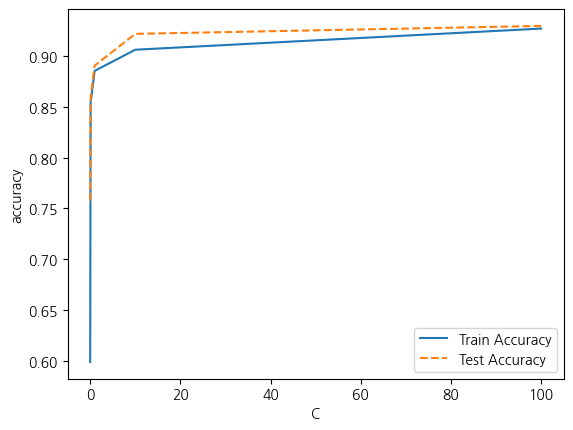

In [106]:
plt.plot(para_c, train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

C값의 변화에 따라 train, test 모델의 정확도가 크게 올라가는 모습을 확인할 수 있다.  
C값의 영향이 크지만 train 모델의 정확도보다 test 모델의 정확도가 더 높기 때문에 개선이 필요

## Gamma(데이터의 영향 범위) 변경에 따른 모델 성능
##### kernel 최적화를 도와주는 파라미터로 하나의 데이터가 동일한 클래스로 분류되게 하려는 영향력의 거리
##### 결정 경계의 곡률 조정, 가우시안 함수의 표준편차의 역
##### gamma가 클수록 1개의 데이터의 영향력 거리가 짧아짐 =  정확도가 높아짐 = sharp해짐

In [107]:
train_accuracy = []; test_accuracy = []

para_gamma = [10 ** gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, random_state=1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [108]:
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,1.0,0.7812
1,0.10,1.0,0.7656
2,1.00,1.0,0.7656
3,10.00,1.0,0.7656


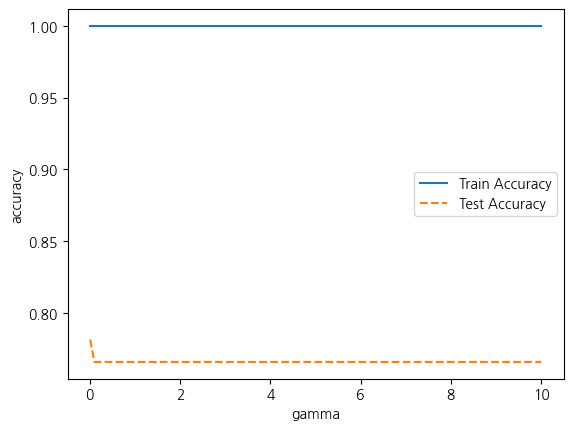

In [109]:
plt.plot(para_gamma, train_accuracy, linestyle='-', label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel("accuracy"); plt.xlabel("gamma")
plt.legend()

gamma는 정확도에 별다른 영향이 없다. => 미지정

## scale 변환  
##### 서포트 벡터 머신은 마진을 기반으로 분류를 한다. 
##### 그래서 데이터의 스케일이 맞지 않으면 거리계산에 영향을  준다 => 모델 성능 저하
##### 데이터 단위의 영향을 많이 받기 때문에 서포트벡터머신을 쓸 때에는 스케일 변환 필수

In [110]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


Standardscaler을 이용하여 설명변수 값의 구간을 동일하게 변경

In [111]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.4, random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))

train data X size : (192, 30)
test data X size : (128, 30)


## scale이 조정된 데이터로 새로운 모델 생성

In [112]:
svm_scaled = SVC(random_state = 1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))

print("Accuracy on test set: {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.995
Accuracy on test set: 0.961


scale을 하기 전과 뚜렷한 변화가 있다

## C(Cost) 변경에 따른 모델 성능
##### 이상치가 포함된 경우 완벽하게 분리할 수 없어 일정 수준의 오류를 허용
##### 얼마나 많은 데이터를 다른 클래스에 놓이는 것을 허용하는지를 결정
##### C가 작을수록 오류를 많이 허용 , C가 클수록 오류를 적게 허용(과대적합주의)

In [113]:
train_accuracy = []; test_accuracy = []

para_c = [c * 0.1 for c in range(1,21)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state=1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
df_accuracy_c= pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAcuuracy"] = test_accuracy

In [114]:
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAcuuracy
0,0.1,0.964,0.906
1,0.2,0.969,0.930
2,0.3,0.974,0.930
3,0.4,0.979,0.938
4,0.5,0.984,0.930
5,0.6,0.995,0.938
6,0.7,0.995,0.945
7,0.8,0.995,0.953
8,0.9,0.995,0.953
9,1.0,0.995,0.961


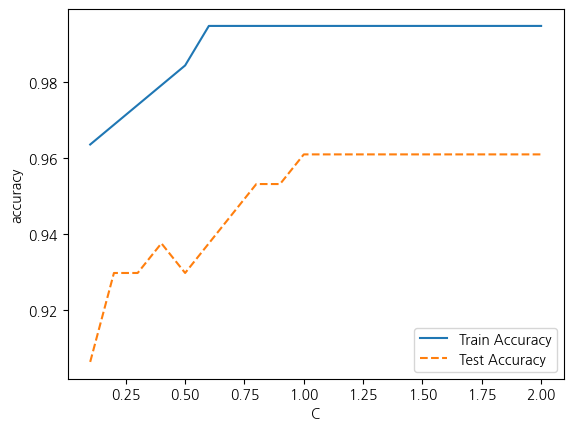

In [115]:
plt.plot(para_c, train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

C가 증가하면 train, test 모델의 성능이 증가한다. test 모델의 정확도가 0.961로 고정되는 시점은 C가 1.0 이상일 때 이다.
그 이후는 고정이고 train, test 모델의 성능의 차이 역시 같기에 1.0으로 결정

## Gamma(데이터의 영향 범위) 변경에 따른 모델 성능
##### kernel 최적화를 도와주는 파라미터로 하나의 데이터가 동일한 클래스로 분류되게 하려는 영향력의 거리
##### 결정 경계의 곡률 조정, 가우시안 함수의 표준편차의 역
##### gamma가 클수록 1개의 데이터의 영향력 거리가 짧아짐 =  정확도가 높아짐 = sharp해짐

In [116]:
train_accuracy = []; test_accuracy = []

para_gamma = [0.05 * gamma for gamma in range(1,15)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma,C = 1.0, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
df_accuracy_gamma= pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [117]:
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.05,0.995,0.938
1,0.10,1.000,0.922
2,0.15,1.000,0.906
3,0.20,1.000,0.906
4,0.25,1.000,0.891
5,0.30,1.000,0.875
6,0.35,1.000,0.875
7,0.40,1.000,0.875
8,0.45,1.000,0.859
9,0.50,1.000,0.867


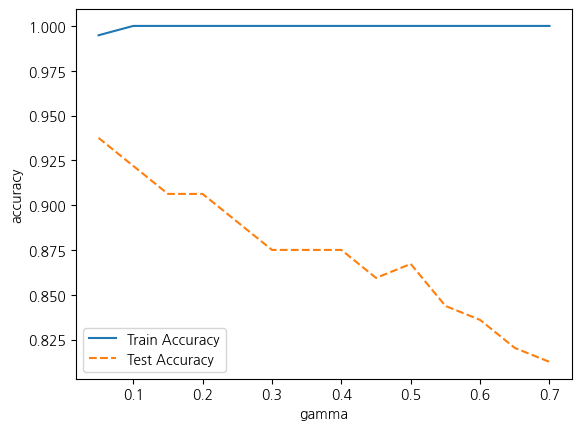

In [118]:
plt.plot(para_gamma, train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel("accuracy"); plt.xlabel("gamma")
plt.legend()

gamma 값이 0.05일 때 test 모델의 정확도가 0.938로 가장 높지만 train 모델의 정확도를 생각하여 0.10으로 선택했다.

## 최종 모델 선택

In [125]:
svc_final = SVC(gamma = 0.10, C = 1.0, random_state = 1234)
svc_final.fit(df_scaled_train_x, df_train_y)
y_pred = svc_final.predict(df_scaled_test_x)

print("Accuracy on training set: {:.3f}".format(svc_final.score(df_scaled_train_x, df_train_y)))

print("Accuracy on test set: {:.3f}\n".format(svc_final.score(df_scaled_test_x, df_test_y)))

print("Confusion matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 1.000
Accuracy on test set: 0.922

Confusion matrix : 
[[91  6]
 [ 4 27]]


Test 데이터 기준 정분류율은 92.2% 이다.

음성을 음성으로 분류한 것이 91개 음성을 양성으로 분류한 것이 4개 이다.

양성을 음성으로 분류한 것이 6개 양성을 양성으로 분류한 것이 27개이다.

유방암의 경우 음성을 양성을 음성으로 판단한 것이 제일 치명적인 오류이다. 

Randomforest 보다 성능이 0.914 -> 0.922 로 더 좋아졌다

In [120]:
print(classification_report(df_test_y, y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.958     0.938     0.948        97
           1      0.818     0.871     0.844        31

    accuracy                          0.922       128
   macro avg      0.888     0.905     0.896       128
weighted avg      0.924     0.922     0.923       128



f1score는 정밀도(precision)과 재현율(recall)의 조화평균(harmonic mean)이다

f1score = 2 * (precision * recall) / (precision + recall) = 0.844

정밀도는 올바르게 분류된 양성 예측(True Positive)/ 전체 양성 예측(True Positive + False Positive) 입니다. 이는 모델이 얼마나 정확한 값을 예측하는지를 파악하는 지표입니다.

precision = TP / (TP + FP) = 0.818

재현율은 실제 양성인 샘플 중 모델이 얼마나 양성 클래스를 잘 분류하는지를 나타내는 지표입니다.

 recall = TP / (TP + FN) = 0.871

fscore는 정밀도와 재현율의 조화 평균이지만, 가중치를 반영하여 계산된다. 따라서 정밀도와 재현율이 모두 높을 때 최대값을 가진다.

fscore는 가중치를 조정할 수 있기 때문에 일반적으로, 데이터가 불균형하게 분포되어 있는 경우에는 fscore를 사용하는 것이 더 나은 결과를 가져올 수 있다.

fscroe의 weighted avg는 0.923으로 꽤 괜찮은 모델이라고 할 수 있다.

In [121]:
estimator = SVC(random_state = 1234)

param_grid = {'C':para_c,
              'gamma':para_gamma}

grid_rf = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs= -1)
grid_rf.fit(df_scaled_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
SVC(C=0.1, gamma=0.05, random_state=1234)

best parameter: 
{'C': 0.1, 'gamma': 0.05}

best score: 
0.958


그리드서치로 최적의 파라미터를 찾은 결과 C값을 0.1로 설정하고 gamma를 0.05로 설정했을 때 score가 0.958로 가장 높은 값이 나옴을 확인할 수 있다.